# Stroke Prediction

Author: Mukhriddin Bakhramov

# Imports

In [103]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config
set_config(display='diagram')


# Scikit-Learn estimators 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,mean_absolute_error, mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# Load the Data

In [10]:
# Stroke Prediction Dataset
# lets load our data
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [11]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Stroke Prediction


* A Stroke is a health condition that causes damage by tearing the blood vessels in the brain. It can also occur when there is a halt in the blood flow and other nutrients to the brain. According to the World Health Organization (WHO), stroke is the leading cause of death and disability globally, This model will try to predict if a person will have stroke or not

* Each row represents a person's features

* This Model will solve a Classification Problem

* There area 11 Feature Matrices in this dataset excluding Target Vector

* This dataset contains 5110 rows

* I find this Dataset to be challenging because the ratio between target distribution is almost 9:1 in favor of 0's as opposed to 1's

In [14]:
missing_value = stroke_df['bmi'].isna().sum()
total_len = len(stroke_df['bmi'])

percentage_of_missing = (missing_value/total_len)*100
percentage_of_missing

3.9334637964774952

In [15]:
cols = stroke_df.columns

for col in cols:
    if stroke_df[col].dtype == "object":
        print(f"{stroke_df[col].value_counts()}\n\n")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Yes    3353
No     1757
Name: ever_married, dtype: int64


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [16]:
cols = stroke_df.columns

for col in cols:
    if stroke_df[col].dtype == "float64" or stroke_df[col].dtype == "int64":
        print(f"{stroke_df[col].value_counts()}\n\n")

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64


78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


0    4612
1     498
Name: hypertension, dtype: int64


0    4834
1     276
Name: heart_disease, dtype: int64


93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64


28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


0    4861
1     249
Name: stroke, dtype: int64




In [17]:
#check for duplicate
stroke_df.duplicated().sum()

0

* Dropped the id and ever_married columns since it's not providing any value to our prediction

In [18]:
# Drop id column for irrelevant data
stroke_df.drop(columns=['id','ever_married'],inplace=True)

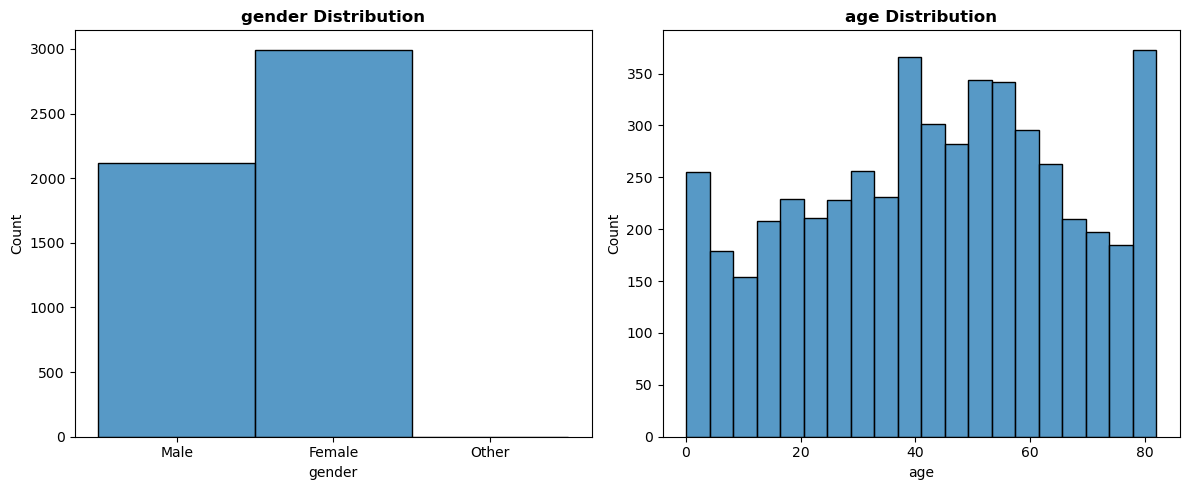

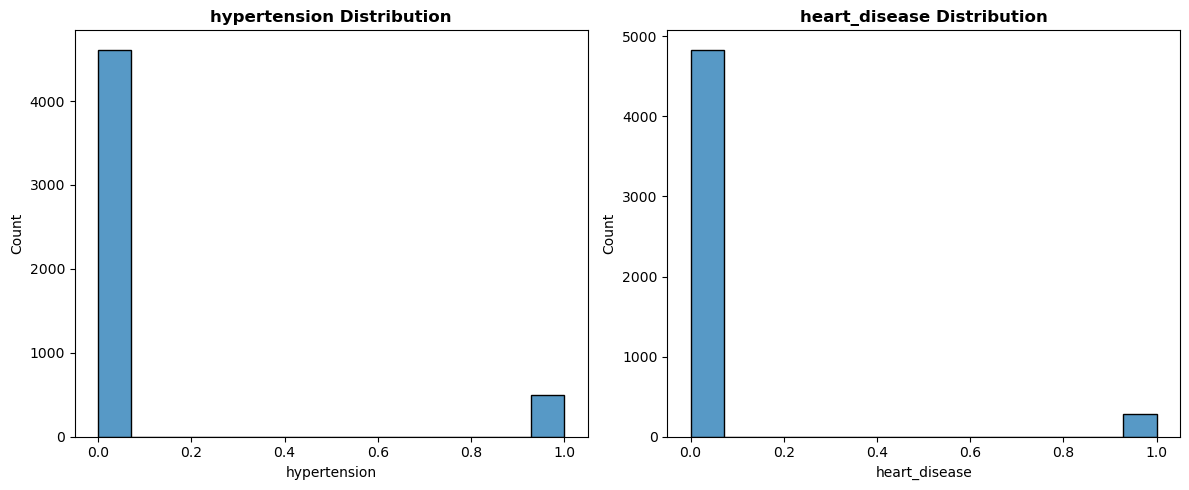

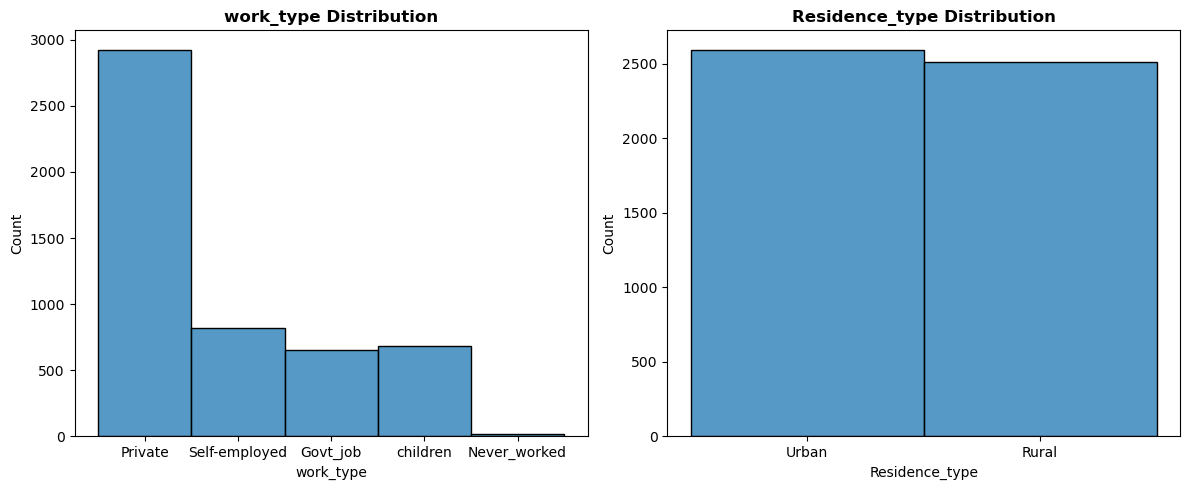

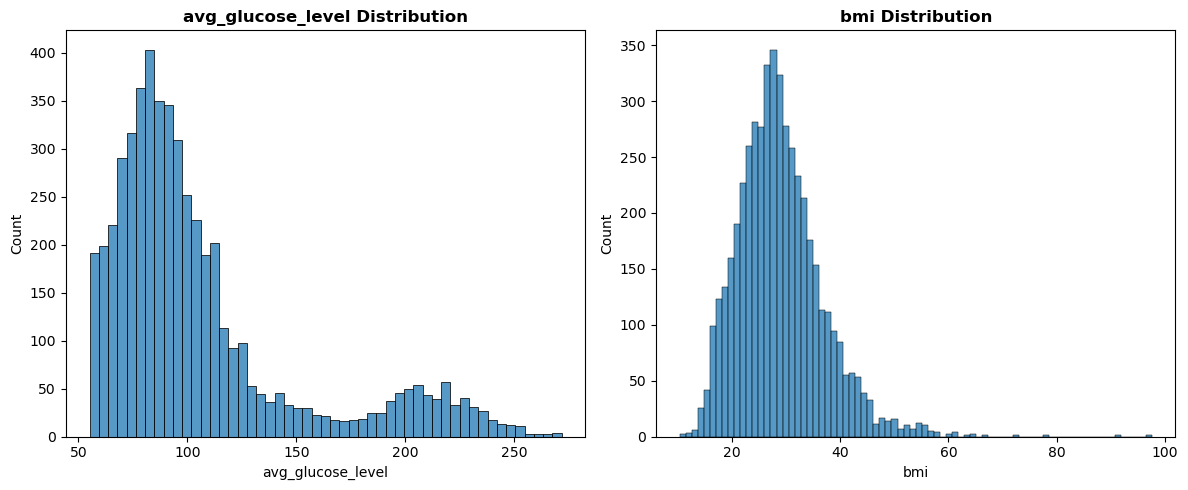

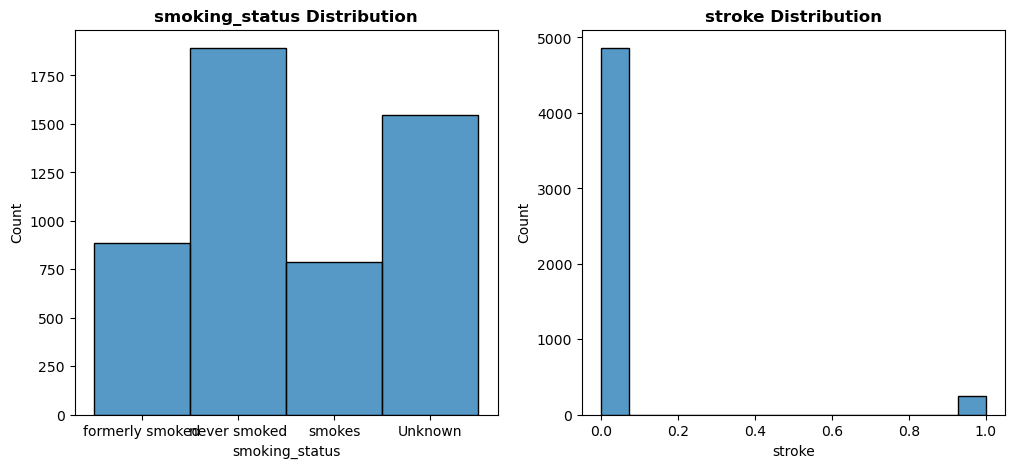

In [19]:
col_ax = 0
row_limit = 4
counter = 0
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
# Iterate to all features and display Historgram
for col in stroke_df.columns:
    # Set Historgram 
    ax=sns.histplot(data=stroke_df, x=col, ax=axes[col_ax])
    axes[col_ax].set_title(col+" Distribution", fontweight="bold")
    
    # Display every 2 cols and set new fig
    if col_ax == 1 and counter != row_limit:
        fig.tight_layout()
        fig, axes = plt.subplots(ncols=2, figsize=(12,5))
        col_ax = 0
        counter += 1
    else:
        col_ax += 1

* Here we can see the Distributions for all features and target
* bmi seemed to have impossible value but upon further research, there was a  record in the past of bmi went as high as 105
* gender have another data point called other that we need to look into
* smoking_status have a lot of unknown that we need to handle during preprocessing

In [20]:
# Create filter for other
stroke_df[stroke_df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,Private,Rural,143.33,22.4,formerly smoked,0


* dropping the gender other since it's insignificant value and outlier in our dataset

In [21]:
# Drop index where other is located
stroke_df.drop(index=3116,inplace=True)

In [22]:
# duble check
stroke_df[stroke_df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [23]:
stroke_df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.333314,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.167770,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.041322,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.175672,0.131991
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.245239,0.127891,0.134905,0.131991,0.042341,1.000000


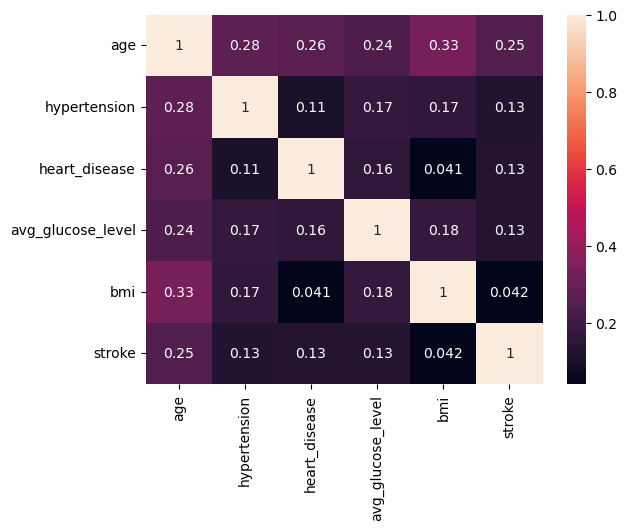

In [24]:
sns.heatmap(stroke_df.corr(), annot=True);

Text(0.5, 1.0, 'BMI based on Age')

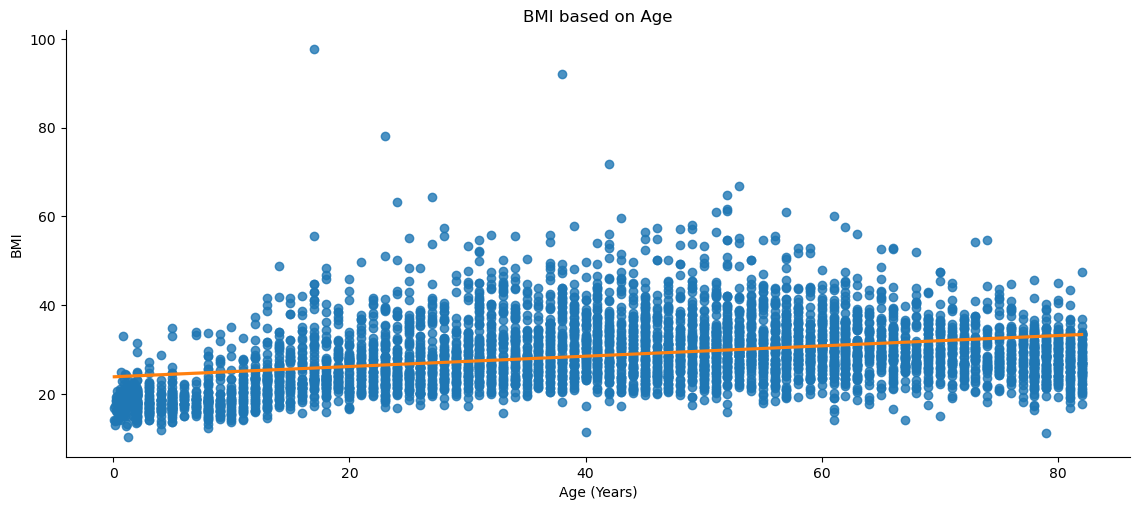

In [25]:
sns.lmplot(data=stroke_df, x='age', y="bmi", line_kws={"color": "C1"},height=5, aspect=2.3);
plt.xlabel("Age (Years)")
plt.ylabel("BMI")
plt.title("BMI based on Age")

### From chart above we can see BMI increases by AGE!

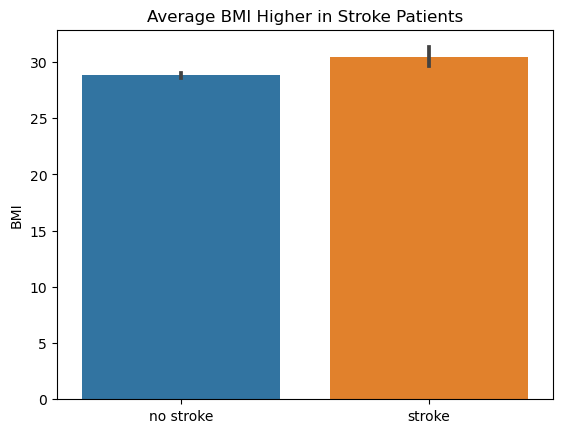

In [26]:
sns.barplot(data=stroke_df, x='stroke', y='bmi');

xticks = plt.xticks()[0]
plt.xticks(xticks, ['no stroke', 'stroke'])

plt.xlabel("")
plt.ylabel("BMI")

plt.title("Average BMI Higher in Stroke Patients")
plt.show()

### from this char above we can see patient who has a stroke has higher BMI

### Pre-processor

In [27]:
# lets check for missing values
stroke_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
# lets check missing values percentage
total_sum = len(stroke_df['bmi'])
miss_sum = stroke_df['bmi'].isna().sum()
print((miss_sum/total_sum)*100)

3.9342337052260716


In [29]:
# now lets fill our missing values with most frequent (mode)
bmi_mode = stroke_df['bmi'].mode()[0]
stroke_df['bmi'].fillna(bmi_mode, inplace=True)
stroke_df['bmi'].isna().sum()

0

In [30]:
stroke_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
cols = stroke_df.columns

for col in cols:
    if stroke_df[col].dtype == "object":
        print(f"{stroke_df[col].value_counts()}\n\n")

Female    2994
Male      2115
Name: gender, dtype: int64


Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64




In [32]:
gender = {'Female': 0, 'Male': 1}
stroke_df['gender'].replace(gender)

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5109, dtype: int64

In [33]:
stroke_df['smoking_status'].isna().sum()

0

* smoking_status has some Unknown status that we can address using model prediction

In [34]:
# create df for train set
train_df_smoke = stroke_df[stroke_df['smoking_status']!='Unknown']
train_df_smoke["smoking_status"].value_counts()

never smoked       1892
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [35]:
test_df_smoke = stroke_df[stroke_df['smoking_status']== "Unknown"]
test_df_smoke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 8 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1544 non-null   object 
 1   age                1544 non-null   float64
 2   hypertension       1544 non-null   int64  
 3   heart_disease      1544 non-null   int64  
 4   work_type          1544 non-null   object 
 5   Residence_type     1544 non-null   object 
 6   avg_glucose_level  1544 non-null   float64
 7   bmi                1544 non-null   float64
 8   smoking_status     1544 non-null   object 
 9   stroke             1544 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 132.7+ KB


In [36]:
# Split feature matrices and target vector for train set
X_train_smoke = train_df_smoke.drop(columns="smoking_status")
y_train_smoke = train_df_smoke["smoking_status"]

# Split feature matrices and target vector for test set
X_test_smoke = test_df_smoke.drop(columns="smoking_status")
y_pred_smoke = stroke_df["smoking_status"]

In [37]:
# Instantiate model 
rf_reg = RandomForestClassifier(random_state=42)

# Transformers 
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore")

# Create feature selectors 
col_select = make_column_selector(dtype_include="object")
num_select = make_column_selector(dtype_include="number")
col_tuple = (ohe, col_select)
num_tuple = (scaler, num_select)

# Create Preprocessor
preprocessor = make_column_transformer(num_tuple, col_tuple)

# Create pipeline
rf_reg_pipe = make_pipeline(preprocessor,rf_reg)

# Train the Model
rf_reg_pipe.fit(X_train_smoke, y_train_smoke)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdba648e0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdba645b0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [38]:
# Predict train set
rf_smoke_train_preds = rf_reg_pipe.predict(X_train_smoke)

In [39]:
# Predict the Unknown values 
y_pred_smoke = rf_reg_pipe.predict(X_test_smoke)
y_pred_smoke[:5] 

array(['formerly smoked', 'never smoked', 'formerly smoked',
       'formerly smoked', 'formerly smoked'], dtype=object)

In [40]:
len(y_pred_smoke)

1544

In [41]:
# Combine our model prediction to test_df 
test_df_smoke["prediction"] = y_pred_smoke
test_df_smoke.sample(5)

/var/folders/bd/fvqpk7z56rx6hbh4dzm7dmc80000gn/T/ipykernel_78260/725409779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_smoke["prediction"] = y_pred_smoke


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,prediction
38,Male,58.00,0,0,Private,Rural,92.62,32.0,Unknown,1,formerly smoked
4944,Male,13.00,0,0,children,Urban,87.98,19.8,Unknown,0,never smoked
3618,Male,0.16,0,0,children,Urban,114.71,17.4,Unknown,0,formerly smoked
480,Male,11.00,0,0,children,Urban,82.58,25.5,Unknown,0,never smoked
4277,Female,2.00,0,0,children,Rural,126.12,24.8,Unknown,0,never smoked


In [42]:
test_df_smoke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 8 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1544 non-null   object 
 1   age                1544 non-null   float64
 2   hypertension       1544 non-null   int64  
 3   heart_disease      1544 non-null   int64  
 4   work_type          1544 non-null   object 
 5   Residence_type     1544 non-null   object 
 6   avg_glucose_level  1544 non-null   float64
 7   bmi                1544 non-null   float64
 8   smoking_status     1544 non-null   object 
 9   stroke             1544 non-null   int64  
 10  prediction         1544 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 144.8+ KB


In [43]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   work_type          5109 non-null   object 
 5   Residence_type     5109 non-null   object 
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   smoking_status     5109 non-null   object 
 9   stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 439.1+ KB


In [44]:
# Drop the missing value feature
test_df_smoke.drop(columns="smoking_status", inplace=True)

/var/folders/bd/fvqpk7z56rx6hbh4dzm7dmc80000gn/T/ipykernel_78260/3640136126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_smoke.drop(columns="smoking_status", inplace=True)


In [45]:
# Double check
test_df_smoke.sample(5)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,stroke,prediction
3119,Female,20.0,0,0,Private,Rural,147.42,26.6,0,never smoked
4641,Female,45.0,0,0,Govt_job,Rural,84.99,35.4,0,never smoked
1089,Female,45.0,0,0,Private,Rural,153.76,36.7,0,never smoked
991,Male,48.0,0,0,Private,Urban,91.96,24.9,0,never smoked
4856,Female,20.0,0,0,Private,Urban,96.69,24.6,0,never smoked


In [46]:
# Replace the column name prediction back to Defaulted
test_df_smoke.rename(columns={"prediction":"smoking_status"},inplace=True)

/var/folders/bd/fvqpk7z56rx6hbh4dzm7dmc80000gn/T/ipykernel_78260/1574823267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_smoke.rename(columns={"prediction":"smoking_status"},inplace=True)


In [120]:
# Double check
test_df_smoke.sample(5)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status
4322,Male,6.0,0,0,children,Urban,91.89,22.4,0,never smoked
2031,Female,32.0,0,0,Private,Urban,114.37,37.8,0,never smoked
714,Female,34.0,0,0,Private,Rural,156.57,28.4,0,never smoked
902,Female,49.0,0,0,Self-employed,Urban,59.76,29.7,0,never smoked
2566,Male,7.0,0,0,children,Urban,86.60,17.1,0,never smoked


In [121]:
# Combine Train and test DataFrame back together into a new df
df_eng_final = pd.concat([train_df_smoke,test_df_smoke])

In [122]:
# Triple check
df_eng_final["smoking_status"].value_counts()

never smoked       3100
formerly smoked    1117
smokes              892
Name: smoking_status, dtype: int64

## Model

In [123]:
df_eng_final.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1


In [124]:
# split our data into X and y
X = df_eng_final.drop(columns='stroke')
y =df_eng_final['stroke'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
df_eng_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   work_type          5109 non-null   object 
 5   Residence_type     5109 non-null   object 
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   smoking_status     5109 non-null   object 
 9   stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 439.1+ KB


In [126]:
# selectors
cat_selector  = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
meadian_imputer = SimpleImputer(strategy='median')

# Scaler
scaler = StandardScaler()

# one-hot-encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [127]:
numeric_pipe = make_pipeline(meadian_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

num_tuple = (numeric_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessors = make_column_transformer(num_tuple, cat_tuple)
preprocessors

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdc0e0d90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdc0e0bb0>)])

In [128]:
# lets use Principal Component Analysis (PCA)
pca_pipe = make_pipeline(preprocessor, PCA(n_components=.80))
pca_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdba648e0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdba645b0>)])),
                ('pca', PCA(n_components=0.8))])

In [129]:
# lets use LinearRegression 
lr_parameters = {}
model = LinearRegression()
lr_grid_pipe = make_pipeline(pca_pipe, model)

lr_grid_search = GridSearchCV(lr_grid_pipe, lr_parameters)
lr_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('standardscaler',
                                                                                          StandardScaler(),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdba648e0>),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdba645b0>)])),
                                                        ('pca',
                                                         PCA(n_components=0.8))])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={})

In [130]:
# lets check score
lr_grid_pred = lr_grid_search.predict(X_test)
lr_grid_score = lr_grid_search.score(X_test, y_test)

print(f'Best Linear Regression Test R2 score is: {r2_score(y_test, lr_grid_pred)}')

Best Linear Regression Test R2 score is: 0.0713818023851579


In [135]:
# now lets use RandomForestRegressor with given hyper parametors
rf_grid_model ={
 'randomforestregressor__max_features': ['auto', 'sqrt'],
 'randomforestregressor__min_samples_leaf': [3,15,20],
 'randomforestregressor__min_samples_split': [2, 10, 100]}

random_forest_model = RandomForestRegressor(random_state=42)
rf_grid_pipe = make_pipeline(pca_pipe, random_forest_model)
rf_grid_search = GridSearchCV(rf_grid_pipe, rf_grid_model)
rf_grid_search.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('standardscaler',
                                                                                          StandardScaler(),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdba648e0>),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f9bdba645b0>)])),
                                                        ('pca',
                                                         PCA(n_components=0.8))])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'randomforestregressor__max_features': ['auto',
                                                                 'sqrt'],
                         'randomforestregressor__min_samples_leaf': [3, 15, 20],
                         'randomforestregressor__min_samples_split': [2, 10,
                                                                      100]})

In [137]:
# lets check score
rf_pred = rf_grid_search.predict(X_test)
rf_grid_score = rf_grid_search.score(X_test, y_test)

print(rf_grid_search.best_params_)
print(f"Best Random Forest test R2 score is {r2_score(y_test, rf_pred)}")


{'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_leaf': 20, 'randomforestregressor__min_samples_split': 100}
Best Random Forest test R2 score is 0.056510133837336274


### For this project i would choise LinearRegression model for production. This model gave us best score and works fast  implementation